## **Voting**

#### **What is Voting?**

(Different models trained with same data)

Voting is a fundamental technique in ensemble learning where the predictions of multiple models are combined to arrive at a final prediction.

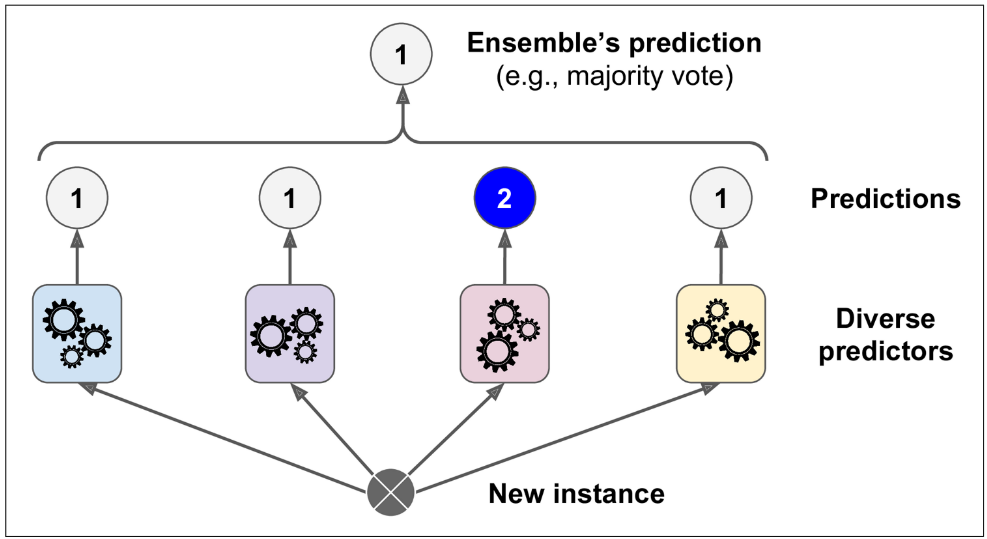

#### **Hard Voting and Soft Voting**

There are two main types of voting:

1. **Hard Voting:**
    - **How it works:**
        - Each base model casts a vote for a class.
        - The class with the most votes is selected as the final prediction.
    - **Example:**
        - Suppose we have three models: Model A, Model B, and Model C.
        - For a given data point, Model A predicts Class A, Model B predicts Class B, and Model C predicts Class A.
        - Since Class A gets two votes and Class B gets one vote, the final prediction would be Class A.


2. **Soft Voting:**
    - **How it works:**
        - Each base model assigns a probability to each class.
        - The probabilities from all models are averaged, and the class with the highest average probability is selected.
    - **Example:**
        For the same data point, 
        - Model A assigns a probability of 0.7 to Class A and 0.3 to Class B.
        - Model B assigns a probability of 0.4 to Class A and 0.6 to Class B.
        - Model C assigns a probability of 0.8 to Class A and 0.2 to Class B.
        - The average probabilities are 0.63 for Class A and 0.37 for Class B.
        - Therefore, the final prediction would be Class A.`

#### **Analogy**

- **Weak Learners and Bias:**
    - A coin with a 51% chance of heads represents a weak learner performing slightly better than guessing.
    - Similarly, weak classifiers (~51% accuracy) are not very strong individually.
- **Majority Wins:**
    - Tossing the coin 1,000 times leads to more heads than tails due to the slight bias.
    - In ensembles, combining many weak classifiers amplifies their overall accuracy.
- **Law of Large Numbers:**
    - The more you toss the coin, the closer the ratio of heads gets to 51%.
    - Likewise, having more weak classifiers makes the ensemble’s predictions more stable and accurate.
- **Effect of Independence:**
    - If coin tosses (or classifier predictions) are independent, errors are less likely to align.
    - Using diverse classifiers improves ensemble accuracy by ensuring independence.
- **Accuracy Boost in Ensembles:**
    - Even weak classifiers (~51% accuracy) can collectively achieve much higher accuracy when combined in an ensemble.

#### **Code**

The following code creates and trains a voting classifier in Scikit-Learn, composed of three diverse classifiers:

In [16]:
from sklearn.datasets import make_moons
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

The **make_moons** dataset is a synthetic dataset generated by the `sklearn.datasets.make_moons` function in scikit-learn, a popular Python machine learning library. It is a binary classification dataset, commonly used for testing and evaluating classification algorithms.

The make_moons dataset consists of:

1. **Two interleaving half circles:** The dataset generates two half-circular clusters, each with 150 samples, in a 2D feature space (x1, x2). The clusters are intertwined, making it a challenging dataset for classification algorithms.
Binary classification: The target variable (y) is binary, with values 0 and 1, indicating which half-circle each sample belongs to.
2. **Noise:** The dataset can be generated with varying levels of Gaussian noise added to the data, controlled by the noise parameter.
3. **Random state:** The dataset is generated randomly, and the random_state parameter allows for reproducibility.

In [18]:
X, y=make_moons(n_samples=200, noise=0.2, random_state=42)

In [19]:
#train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
#Base Models
log_clf=LogisticRegression()
rnd_clf=RandomForestClassifier()
svm_clf=SVC()

In [33]:
#Voting Ensemble
estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)]
voting_clf=VotingClassifier(estimators=estimators, voting='hard')

In [28]:
#Training voting classifier
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(probability=True))],
                 voting='soft')

Checking the accuracy of each classifier

In [35]:
accuracy_name_list=list()
accuracy_score_list=list()
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    accuracy_name_list.append(clf.__class__.__name__)
    accuracy_score_list.append(accuracy_score(y_test, y_pred))
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.85
RandomForestClassifier 0.925
SVC 0.95
VotingClassifier 0.95


Graphical representation

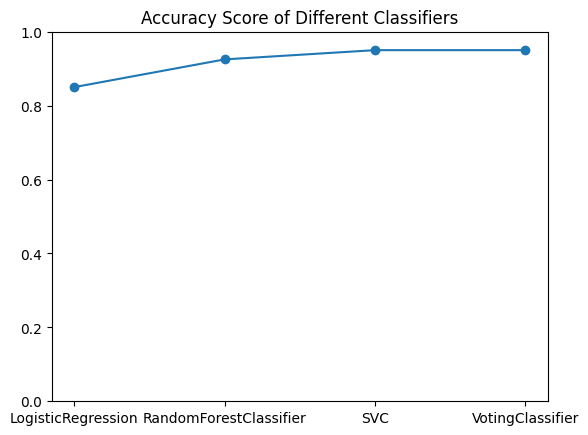

In [38]:
import matplotlib.pyplot as plt
plt.title('Accuracy Score of Different Classifiers')
plt.plot(accuracy_name_list, accuracy_score_list, marker='o')
plt.ylim([0,1])
plt.show()